# Proyecto Final

## Cargar dataset

In [1]:
!git clone https://github.com/Fernando-JAL/Neurociencias-2025-2.git

import os
os.chdir('/content/Neurociencias-2025-2/S06_proyecto/dataset')

!ls

Cloning into 'Neurociencias-2025-2'...
remote: Enumerating objects: 56855, done.
remote: Counting objects: 100% (333/333), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 56855 (delta 237), reused 238 (delta 180), pack-reused 56522 (from 4)
Receiving objects: 100% (56855/56855), 998.70 MiB | 30.17 MiB/s, done.
Resolving deltas: 100% (6144/6144), done.
Updating files: 100% (25232/25232), done.
Testing  Training


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/Neurociencias-2025-2/S06_proyecto/dataset/Training'
test_dir = '/content/Neurociencias-2025-2/S06_proyecto/dataset/Testing'

image_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


## 1. Análisis exploratorio del datos (AED)

### Visualizar con gráfico de barras

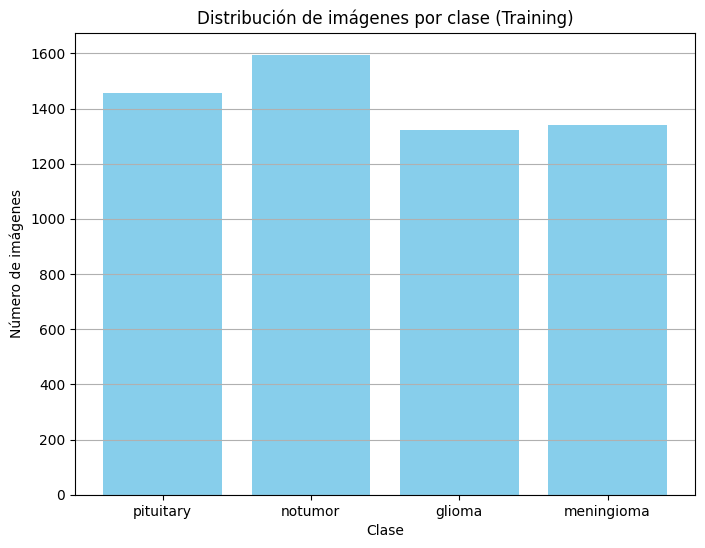

In [3]:
import os
import matplotlib.pyplot as plt

train_dir = '/content/Neurociencias-2025-2/S06_proyecto/dataset/Training'

class_counts = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        class_counts[class_name] = len(os.listdir(class_path))

plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Distribución de imágenes por clase (Training)')
plt.xlabel('Clase')
plt.ylabel('Número de imágenes')
plt.grid(axis='y')
plt.show()

### Verificar patrones

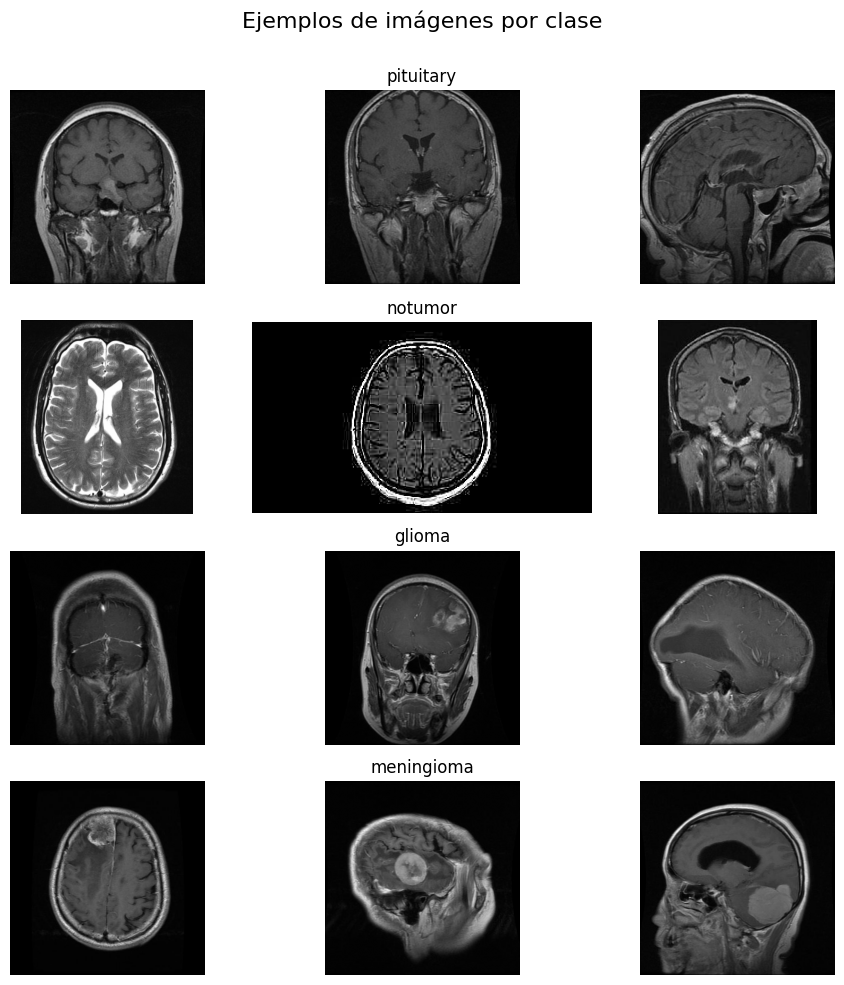

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

fig, axes = plt.subplots(4, 3, figsize=(10, 10))
fig.suptitle('Ejemplos de imágenes por clase', fontsize=16)

classes = os.listdir(train_dir)

for i, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    images = random.sample(os.listdir(class_path), 3)
    for j, img_name in enumerate(images):
        img_path = os.path.join(class_path, img_name)
        img = mpimg.imread(img_path)
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].axis('off')
        if j == 1:
            axes[i, j].set_title(class_name)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Conclusión

Tipo de problema:	clasificación multiclase

Clases:	Glioma, Meningioma, Pituitary, No Tumor

Distribución:	relativamente balanceada

Tipo de datos:	imágenes

## Propuesta de modelos

### Propongo implementar dos modelos para después compararlos:
### A. Modelos Supervisados Clásicos:
Extraeré las características de color textura y forma y entrenaré modelos SVM, Random Forest, K-NN y Árboles de Decisión

La limitación es que estos modelos no aprenden directamente de la imagen, por lo que ante imágenes crudas puede tener en desempeño más bajo, pero resulta ideal para compararlo con una CNN

### B. Modelo basado en CNN
Es más sencillo pero efectivo

## A. Modelos Supervisados Clásicos

### Preprocesamiento y extracción de características

In [5]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.feature import hog
from tqdm import tqdm

train_dir = '/content/Neurociencias-2025-2/S06_proyecto/dataset/Training'
image_size = (128, 128)

X = []
y = []

class_labels = sorted(os.listdir(train_dir))
label_map = {label: idx for idx, label in enumerate(class_labels)}

for label in class_labels:
    path = os.path.join(train_dir, label)
    for img_name in tqdm(os.listdir(path), desc=f"Procesando {label}"):
        img_path = os.path.join(path, img_name)
        try:
            img = imread(img_path)
            img = resize(img, image_size)
            gray = rgb2gray(img)
            features, _ = hog(gray, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)
            X.append(features)
            y.append(label_map[label])
        except:
            print("Error con:", img_path)

X = np.array(X)
y = np.array(y)

print("Shape de X:", X.shape)
print("Clases:", class_labels)

Procesando glioma:   1%|          | 12/1321 [00:00<00:11, 117.54it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1083.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1135.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0688.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0301.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0844.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0869.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0433.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1287.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0598.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0771.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:   3%|▎         | 36/1321 [00:00<00:13, 96.07it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1149.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0272.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1157.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0178.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0607.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0342.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1213.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0545.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1104.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0694.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:   4%|▎         | 47/1321 [00:00<00:13, 91.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0429.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0284.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1274.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0262.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0928.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0456.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0152.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1014.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0626.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0153.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:   5%|▌         | 70/1321 [00:00<00:12, 96.47it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0127.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0648.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1133.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0863.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0209.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0653.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0793.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0403.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1024.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1000.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:   7%|▋         | 90/1321 [00:00<00:12, 95.05it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0367.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0745.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0625.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1189.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1111.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0128.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0183.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1030.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0611.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0608.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:   8%|▊         | 111/1321 [00:01<00:12, 97.29it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0633.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0184.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1308.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0265.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1064.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0462.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0515.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0639.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0788.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0952.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  10%|█         | 135/1321 [00:01<00:11, 101.22it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1234.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0567.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0555.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0387.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0807.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1207.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0942.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1052.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0304.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0326.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  12%|█▏        | 156/1321 [00:01<00:12, 95.16it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0856.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0815.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0215.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0185.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0813.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0965.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1305.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0496.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0762.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1194.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  14%|█▍        | 182/1321 [00:01<00:11, 97.96it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0757.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0785.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0876.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0228.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0743.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0606.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0702.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0140.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0295.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0558.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  15%|█▍        | 192/1321 [00:02<00:11, 96.03it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1270.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0551.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0373.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0298.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1016.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0704.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0173.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0961.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0308.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1077.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  16%|█▌        | 214/1321 [00:02<00:11, 96.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0773.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0388.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0803.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0170.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0344.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1118.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0360.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1025.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0219.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0574.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  18%|█▊        | 234/1321 [00:02<00:12, 88.78it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0409.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1289.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0448.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0234.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0253.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0365.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1267.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0488.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0145.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0337.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  19%|█▉        | 255/1321 [00:02<00:11, 93.69it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1222.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0269.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0784.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0131.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0474.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0239.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1057.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1054.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0736.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0816.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  21%|██        | 275/1321 [00:02<00:12, 85.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1002.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0235.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0156.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0179.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0449.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0711.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1282.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0537.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0568.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1238.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  21%|██▏       | 284/1321 [00:03<00:13, 76.11it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0246.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0150.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0957.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0615.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1162.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0850.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0439.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0886.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1312.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1164.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  23%|██▎       | 300/1321 [00:03<00:15, 65.84it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0513.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1044.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0195.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1116.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0724.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1186.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0288.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1069.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0851.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0472.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  23%|██▎       | 307/1321 [00:03<00:16, 62.73it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0883.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0806.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1053.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1316.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1263.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1161.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0442.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1295.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0190.jpg


Procesando glioma:  24%|██▍       | 321/1321 [00:03<00:16, 59.05it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0330.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0198.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1055.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0222.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0306.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0452.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1106.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0893.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0165.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0935.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  26%|██▌       | 339/1321 [00:04<00:15, 64.25it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0453.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0698.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0465.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0929.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0455.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0666.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0581.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0481.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0604.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0132.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  26%|██▋       | 348/1321 [00:04<00:14, 69.25it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0213.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0709.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0689.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0317.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0744.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0501.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0819.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1090.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1120.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0241.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  28%|██▊       | 364/1321 [00:04<00:15, 63.56it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1255.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1088.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0912.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0782.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0345.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0755.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0682.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0321.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1172.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1279.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  28%|██▊       | 371/1321 [00:04<00:15, 60.58it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1268.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0963.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0454.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1102.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0440.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1223.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0878.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0430.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1262.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1100.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  29%|██▉       | 387/1321 [00:04<00:16, 55.66it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0412.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0529.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0945.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0136.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0946.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0814.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0468.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0471.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0296.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0391.jpg


Procesando glioma:  30%|███       | 402/1321 [00:05<00:14, 61.52it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0383.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1066.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0742.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0491.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0350.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1026.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0450.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1220.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0562.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0980.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  31%|███       | 409/1321 [00:05<00:17, 52.28it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0730.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0895.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1269.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1071.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0691.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0809.jpg


Procesando glioma:  32%|███▏      | 422/1321 [00:05<00:16, 54.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1132.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1200.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0161.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1153.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1303.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1248.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1059.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1314.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0937.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1178.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  33%|███▎      | 439/1321 [00:05<00:14, 62.44it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0834.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0823.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0660.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0887.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1117.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0723.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0423.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0706.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0896.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1068.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  34%|███▍      | 447/1321 [00:05<00:13, 66.00it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1297.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1049.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0995.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0862.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0969.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0931.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0636.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0411.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0733.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0791.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  35%|███▍      | 460/1321 [00:06<00:17, 49.19it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0962.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0424.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0242.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1230.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1109.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0802.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1042.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0483.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1320.jpg


Procesando glioma:  36%|███▌      | 478/1321 [00:06<00:13, 63.50it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1142.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0287.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1084.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0361.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0276.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0669.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0596.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0486.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0986.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0564.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  38%|███▊      | 496/1321 [00:06<00:11, 73.25it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0395.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0248.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0750.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0364.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1089.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1168.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0381.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0808.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0297.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0847.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  39%|███▉      | 512/1321 [00:06<00:11, 70.81it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0972.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0798.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0629.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1171.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1205.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0334.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0665.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0438.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0182.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1241.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  40%|███▉      | 528/1321 [00:07<00:11, 67.39it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0484.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1001.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0399.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0715.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0370.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0783.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1272.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0727.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0307.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0804.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  41%|████      | 544/1321 [00:07<00:11, 69.99it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1159.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1260.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0858.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0910.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0991.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1158.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1209.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0338.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1123.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0341.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  43%|████▎     | 563/1321 [00:07<00:09, 80.68it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0933.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0738.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1081.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0890.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1199.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0988.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0990.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0362.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0547.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0979.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  44%|████▍     | 584/1321 [00:07<00:08, 82.27it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1155.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1206.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0760.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0586.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1302.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0226.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1082.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0703.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0511.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0739.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  45%|████▍     | 593/1321 [00:07<00:08, 83.99it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1184.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0953.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0982.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1202.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0480.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0659.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0252.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0302.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1315.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1154.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  47%|████▋     | 624/1321 [00:08<00:07, 92.81it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1197.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0699.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0719.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1027.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0332.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0566.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0997.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1283.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0238.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0992.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  48%|████▊     | 634/1321 [00:08<00:07, 91.13it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0627.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0498.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0124.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0155.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1011.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1179.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0274.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1128.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1212.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0505.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  50%|████▉     | 657/1321 [00:08<00:07, 91.77it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1261.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0624.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0623.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0685.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0621.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0435.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0138.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0583.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0164.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0312.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  51%|█████     | 670/1321 [00:08<00:06, 100.58it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1257.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0614.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0779.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0231.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0159.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1136.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1249.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0186.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0134.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0422.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  52%|█████▏    | 691/1321 [00:08<00:07, 84.33it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0681.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0885.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0530.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0194.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1003.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1098.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0147.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0643.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1009.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1211.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  54%|█████▍    | 713/1321 [00:09<00:06, 87.12it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0958.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0922.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1087.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0420.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0325.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1017.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0244.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1214.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0618.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0722.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  55%|█████▌    | 733/1321 [00:09<00:06, 88.77it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0775.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0734.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1196.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1097.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0552.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0427.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0613.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1056.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0913.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0710.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  56%|█████▌    | 743/1321 [00:09<00:06, 84.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0400.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1165.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0940.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0900.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0686.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0237.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0748.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1306.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0375.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0534.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  58%|█████▊    | 761/1321 [00:09<00:06, 81.26it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0485.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1300.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0843.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0544.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1235.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0203.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0508.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0451.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0256.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0275.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  59%|█████▉    | 779/1321 [00:10<00:06, 79.71it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0827.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1096.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0638.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1275.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0267.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1252.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0122.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0585.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1062.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0447.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  61%|██████    | 800/1321 [00:10<00:05, 91.01it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1013.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1145.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0258.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0853.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0349.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0632.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0756.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0960.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0319.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0766.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  61%|██████▏   | 812/1321 [00:10<00:05, 91.55it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0528.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0527.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0898.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0936.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0580.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1258.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0415.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0799.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0830.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0603.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  63%|██████▎   | 832/1321 [00:10<00:05, 88.09it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0133.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0434.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0271.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0840.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0690.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0868.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1298.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0351.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0514.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0303.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  64%|██████▍   | 851/1321 [00:10<00:05, 89.67it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0795.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0835.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0920.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0546.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1129.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0837.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0700.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0897.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1180.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0673.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  66%|██████▌   | 872/1321 [00:11<00:05, 88.79it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0796.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0556.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0540.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1034.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0915.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1035.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1253.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0871.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0794.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0565.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  68%|██████▊   | 894/1321 [00:11<00:04, 94.98it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1240.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0661.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0519.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0512.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0494.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0708.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0726.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0790.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0193.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0461.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  69%|██████▉   | 917/1321 [00:11<00:04, 92.52it/s] 

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0259.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0318.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0731.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1050.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0377.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0220.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0291.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0123.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0605.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1022.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  70%|███████   | 930/1321 [00:11<00:04, 94.28it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0467.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0509.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1281.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0390.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0323.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0674.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0225.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0236.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0725.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0157.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  72%|███████▏  | 949/1321 [00:11<00:04, 83.21it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0250.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1099.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0881.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0884.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0207.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0121.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0576.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1152.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0966.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0967.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  73%|███████▎  | 967/1321 [00:12<00:04, 83.53it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0187.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0751.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0683.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0676.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0457.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0667.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0789.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0634.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0380.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1182.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  75%|███████▌  | 992/1321 [00:12<00:03, 101.07it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1114.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0520.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0407.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0535.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0714.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1311.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0950.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0299.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1126.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0333.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  77%|███████▋  | 1015/1321 [00:12<00:03, 96.60it/s] 

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0130.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1067.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0591.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1105.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1115.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0996.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0654.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1140.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0764.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0908.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  78%|███████▊  | 1035/1321 [00:12<00:03, 93.42it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0839.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0286.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0718.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1093.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0671.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1060.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0142.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0753.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0774.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1010.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  80%|████████  | 1058/1321 [00:12<00:02, 98.60it/s] 

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0290.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1113.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0687.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0210.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0977.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1247.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0538.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0818.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0378.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0199.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  82%|████████▏ | 1082/1321 [00:13<00:02, 108.29it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0832.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0749.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0658.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0880.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1174.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0825.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0212.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0616.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1047.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0728.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  84%|████████▎ | 1104/1321 [00:13<00:02, 100.46it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0359.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1032.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0943.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1130.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0909.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1236.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0866.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0315.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0763.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0497.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  85%|████████▌ | 1125/1321 [00:13<00:02, 92.99it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0428.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1193.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1039.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0478.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0328.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0631.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0531.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0602.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0200.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0870.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  86%|████████▌ | 1138/1321 [00:13<00:01, 95.03it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0181.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0617.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1239.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1046.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0168.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0983.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0475.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0396.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0857.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1121.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  88%|████████▊ | 1161/1321 [00:14<00:01, 102.12it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0846.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1156.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0310.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0932.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0584.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0459.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0836.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1127.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0371.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0707.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  90%|████████▉ | 1185/1321 [00:14<00:01, 108.74it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0956.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1020.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0740.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0721.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1244.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1058.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0217.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0758.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0279.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0663.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  92%|█████████▏| 1209/1321 [00:14<00:01, 103.95it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0357.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0280.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0196.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1006.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0261.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1151.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0951.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0955.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0389.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0824.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  93%|█████████▎| 1222/1321 [00:14<00:00, 109.06it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1201.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0417.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0524.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1166.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0939.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0426.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0166.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0525.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0926.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0854.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  94%|█████████▍| 1244/1321 [00:14<00:00, 92.51it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0600.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0655.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0245.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0523.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0892.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0577.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0309.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0917.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0177.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0268.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  96%|█████████▌| 1264/1321 [00:15<00:00, 92.18it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0539.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1094.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0888.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0125.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0852.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0294.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1228.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0668.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1276.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0656.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  98%|█████████▊| 1288/1321 [00:15<00:00, 103.36it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1150.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0559.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0141.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1005.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0622.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1028.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0640.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0919.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0927.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1256.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training

Procesando glioma:  98%|█████████▊| 1299/1321 [00:15<00:00, 98.40it/s] 

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0947.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1061.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0249.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0281.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0720.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0322.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0285.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0374.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_1313.jpg


Procesando glioma:  99%|█████████▉| 1309/1321 [00:15<00:00, 76.05it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0833.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0410.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0221.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0811.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0589.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0408.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0891.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0201.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0425.jpg


Procesando glioma: 100%|██████████| 1321/1321 [00:15<00:00, 83.01it/s]


Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0572.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0894.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/glioma/Tr-gl_0882.jpg


Procesando meningioma:   0%|          | 0/1339 [00:00<?, ?it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1205.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1317.jpg


Procesando meningioma:   0%|          | 4/1339 [00:00<00:39, 33.77it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0809.jpg


Procesando meningioma:   1%|          | 8/1339 [00:00<00:50, 26.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0880.jpg


Procesando meningioma:   1%|          | 16/1339 [00:00<00:39, 33.32it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1039.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1013.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0889.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1075.jpg


Procesando meningioma:   2%|▏         | 24/1339 [00:00<00:47, 27.41it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0868.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0907.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0996.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1290.jpg


Procesando meningioma:   3%|▎         | 37/1339 [00:01<00:46, 28.14it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1194.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1308.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1307.jpg


Procesando meningioma:   3%|▎         | 46/1339 [00:01<00:41, 31.23it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1157.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0877.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1253.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1331.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1188.jpg


Procesando meningioma:   4%|▍         | 55/1339 [00:01<00:39, 32.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0832.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0811.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1259.jpg


Procesando meningioma:   5%|▌         | 67/1339 [00:02<00:28, 45.27it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0835.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1212.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0997.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1257.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0791.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0903.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0914.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0858.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1255.jpg


Procesando meningioma:   6%|▌         | 79/1339 [00:02<00:28, 44.40it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1003.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1174.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1008.jpg


Procesando meningioma:   7%|▋         | 90/1339 [00:02<00:27, 45.91it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0910.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0953.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1021.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1265.jpg


Procesando meningioma:   7%|▋         | 100/1339 [00:02<00:27, 44.46it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1297.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1184.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0899.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1254.jpg


Procesando meningioma:   8%|▊         | 109/1339 [00:03<00:45, 27.03it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0932.jpg


Procesando meningioma:   9%|▊         | 117/1339 [00:03<00:40, 30.52it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1252.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1325.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1079.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1250.jpg


Procesando meningioma:  10%|▉         | 131/1339 [00:03<00:32, 37.11it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1237.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0860.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1172.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1116.jpg


Procesando meningioma:  11%|█         | 143/1339 [00:04<00:32, 36.67it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0801.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0827.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1052.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1333.jpg


Procesando meningioma:  12%|█▏        | 158/1339 [00:04<00:29, 40.09it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1249.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1287.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1305.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1226.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0844.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1158.jpg


Procesando meningioma:  13%|█▎        | 168/1339 [00:04<00:30, 38.26it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0797.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0983.jpg


Procesando meningioma:  14%|█▍        | 185/1339 [00:05<00:30, 37.36it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0824.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1127.jpg


Procesando meningioma:  15%|█▌        | 202/1339 [00:05<00:23, 47.98it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1239.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0793.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0906.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1323.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1320.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1126.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0961.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0947.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0855.jpg


Procesando meningioma:  16%|█▌        | 212/1339 [00:05<00:24, 46.44it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1225.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1148.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1199.jpg


Procesando meningioma:  17%|█▋        | 222/1339 [00:06<00:27, 40.79it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0849.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1175.jpg


Procesando meningioma:  17%|█▋        | 227/1339 [00:06<00:27, 40.95it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0995.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1051.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0981.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1260.jpg


Procesando meningioma:  18%|█▊        | 242/1339 [00:06<00:25, 43.43it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1115.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0875.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0863.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0810.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0990.jpg


Procesando meningioma:  19%|█▊        | 248/1339 [00:06<00:24, 44.79it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0829.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1101.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0955.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1090.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1057.jpg


Procesando meningioma:  19%|█▉        | 259/1339 [00:07<00:25, 42.16it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0800.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1033.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1165.jpg


Procesando meningioma:  20%|██        | 269/1339 [00:07<00:25, 41.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0969.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0893.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0992.jpg


Procesando meningioma:  21%|██        | 279/1339 [00:07<00:25, 41.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1266.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0838.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1178.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0845.jpg


Procesando meningioma:  22%|██▏       | 293/1339 [00:07<00:29, 36.06it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1017.jpg


Procesando meningioma:  22%|██▏       | 299/1339 [00:08<00:25, 40.84it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1027.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1243.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0882.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0902.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1082.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1299.jpg


Procesando meningioma:  23%|██▎       | 310/1339 [00:08<00:23, 43.23it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1211.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1031.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1084.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1068.jpg


Procesando meningioma:  24%|██▍       | 325/1339 [00:08<00:24, 42.11it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0850.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1136.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1145.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1197.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1129.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0887.jpg


Procesando meningioma:  25%|██▌       | 336/1339 [00:08<00:22, 45.33it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1020.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1171.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1276.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1054.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1030.jpg


Procesando meningioma:  26%|██▌       | 351/1339 [00:09<00:23, 42.92it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1036.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1258.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0819.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1098.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0812.jpg


Procesando meningioma:  27%|██▋       | 368/1339 [00:09<00:19, 50.07it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0862.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1104.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0954.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1045.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1236.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1011.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1093.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1195.jpg


Procesando meningioma:  28%|██▊       | 374/1339 [00:09<00:19, 50.55it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0866.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0960.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0937.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0982.jpg


Procesando meningioma:  29%|██▉       | 388/1339 [00:09<00:18, 52.82it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1050.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0962.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1221.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0912.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1040.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0834.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0984.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1246.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0842.jpg


Procesando meningioma:  30%|██▉       | 400/1339 [00:10<00:18, 50.82it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1235.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1214.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1092.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1095.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0904.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1118.jpg


Procesando meningioma:  31%|███       | 413/1339 [00:10<00:18, 50.73it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1156.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0839.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1193.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0966.jpg


Procesando meningioma:  32%|███▏      | 425/1339 [00:10<00:18, 50.56it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0943.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1306.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1268.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0847.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1185.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0911.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1085.jpg


Procesando meningioma:  33%|███▎      | 436/1339 [00:10<00:19, 45.41it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1167.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0807.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0926.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1002.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1109.jpg


Procesando meningioma:  34%|███▍      | 454/1339 [00:11<00:17, 51.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1168.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1102.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0814.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1316.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0857.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1016.jpg


Procesando meningioma:  34%|███▍      | 460/1339 [00:11<00:19, 45.86it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1069.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1130.jpg


Procesando meningioma:  35%|███▌      | 470/1339 [00:11<00:18, 46.88it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1139.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1189.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0846.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1091.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1269.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1213.jpg


Procesando meningioma:  36%|███▌      | 480/1339 [00:11<00:22, 38.11it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0917.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1285.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0870.jpg


Procesando meningioma:  37%|███▋      | 489/1339 [00:12<00:26, 32.58it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1192.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1042.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1131.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0985.jpg


Procesando meningioma:  37%|███▋      | 502/1339 [00:12<00:25, 32.59it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1138.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1318.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0972.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1135.jpg


Procesando meningioma:  38%|███▊      | 507/1339 [00:12<00:24, 33.74it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1121.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1034.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0859.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0919.jpg


Procesando meningioma:  38%|███▊      | 515/1339 [00:13<00:26, 30.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1149.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1247.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1289.jpg


Procesando meningioma:  39%|███▉      | 523/1339 [00:13<00:29, 28.09it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1244.jpg


Procesando meningioma:  40%|███▉      | 529/1339 [00:13<00:31, 25.80it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0936.jpg


Procesando meningioma:  40%|████      | 540/1339 [00:14<00:27, 29.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1206.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0975.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1329.jpg


Procesando meningioma:  41%|████      | 550/1339 [00:14<00:20, 38.28it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1187.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1291.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1001.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0881.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1089.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1119.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1310.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0980.jpg


Procesando meningioma:  42%|████▏     | 561/1339 [00:14<00:19, 40.32it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1064.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0831.jpg


Procesando meningioma:  43%|████▎     | 570/1339 [00:14<00:26, 29.01it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0833.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0952.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1332.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1229.jpg


Procesando meningioma:  43%|████▎     | 574/1339 [00:15<00:31, 24.31it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0965.jpg


Procesando meningioma:  43%|████▎     | 580/1339 [00:15<00:34, 21.91it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1088.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0979.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1162.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1155.jpg


Procesando meningioma:  44%|████▍     | 586/1339 [00:15<00:31, 23.89it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0900.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0978.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0798.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1293.jpg


Procesando meningioma:  44%|████▍     | 593/1339 [00:16<00:34, 21.63it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1216.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0948.jpg


Procesando meningioma:  45%|████▍     | 602/1339 [00:16<00:35, 20.76it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1315.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0896.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0861.jpg


Procesando meningioma:  45%|████▌     | 609/1339 [00:16<00:34, 20.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1294.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0805.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1014.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1015.jpg


Procesando meningioma:  46%|████▌     | 612/1339 [00:17<00:34, 21.35it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0924.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1210.jpg


Procesando meningioma:  46%|████▋     | 621/1339 [00:17<00:31, 22.78it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1322.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1153.jpg


Procesando meningioma:  47%|████▋     | 630/1339 [00:17<00:22, 30.90it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1058.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0991.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0816.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0993.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0871.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1328.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0987.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1134.jpg


Procesando meningioma:  48%|████▊     | 638/1339 [00:17<00:21, 31.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0994.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1023.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1283.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1262.jpg


Procesando meningioma:  48%|████▊     | 642/1339 [00:18<00:21, 32.43it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0808.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0949.jpg


Procesando meningioma:  49%|████▊     | 651/1339 [00:18<00:21, 32.14it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1223.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1230.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0830.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1321.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0944.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1073.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1049.jpg


Procesando meningioma:  49%|████▉     | 656/1339 [00:18<00:19, 35.55it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1111.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1278.jpg


Procesando meningioma:  50%|████▉     | 664/1339 [00:18<00:27, 24.21it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1202.jpg


Procesando meningioma:  50%|████▉     | 667/1339 [00:19<00:29, 22.70it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1222.jpg


Procesando meningioma:  50%|█████     | 674/1339 [00:19<00:34, 19.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1326.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0836.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1177.jpg


Procesando meningioma:  51%|█████     | 677/1339 [00:19<00:38, 17.18it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1078.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0942.jpg


Procesando meningioma:  51%|█████     | 680/1339 [00:19<00:36, 17.90it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1144.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1063.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1201.jpg


Procesando meningioma:  51%|█████▏    | 687/1339 [00:20<00:35, 18.22it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1209.jpg


Procesando meningioma:  52%|█████▏    | 695/1339 [00:20<00:33, 19.05it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0817.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0885.jpg


Procesando meningioma:  52%|█████▏    | 702/1339 [00:21<00:33, 18.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0964.jpg


Procesando meningioma:  53%|█████▎    | 709/1339 [00:21<00:31, 20.14it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1240.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1048.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0921.jpg


Procesando meningioma:  53%|█████▎    | 716/1339 [00:21<00:38, 16.36it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1120.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1047.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0869.jpg


Procesando meningioma:  54%|█████▍    | 728/1339 [00:22<00:25, 24.11it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1295.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1270.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1071.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0803.jpg


Procesando meningioma:  56%|█████▌    | 744/1339 [00:22<00:15, 39.41it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1100.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0823.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1231.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1137.jpg


Procesando meningioma:  56%|█████▋    | 756/1339 [00:22<00:12, 44.94it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1288.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1251.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1000.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1233.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1117.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0986.jpg


Procesando meningioma:  57%|█████▋    | 761/1339 [00:23<00:13, 41.44it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1122.jpg


Procesando meningioma:  58%|█████▊    | 773/1339 [00:23<00:12, 43.60it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1208.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1219.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0939.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1074.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1108.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1038.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0908.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0818.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1164.jpg


Procesando meningioma:  59%|█████▉    | 791/1339 [00:23<00:10, 50.13it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0795.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0905.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1313.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1182.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1284.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0804.jpg


Procesando meningioma:  60%|█████▉    | 797/1339 [00:23<00:11, 47.50it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0884.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0872.jpg


Procesando meningioma:  60%|██████    | 807/1339 [00:24<00:13, 39.45it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1123.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1301.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1170.jpg


Procesando meningioma:  61%|██████    | 812/1339 [00:24<00:15, 34.85it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1147.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1141.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0931.jpg


Procesando meningioma:  61%|██████    | 820/1339 [00:24<00:16, 32.39it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1200.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0806.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0929.jpg


Procesando meningioma:  62%|██████▏   | 831/1339 [00:25<00:18, 27.62it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1335.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0974.jpg


Procesando meningioma:  62%|██████▏   | 835/1339 [00:25<00:17, 28.55it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1125.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1169.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1096.jpg


Procesando meningioma:  63%|██████▎   | 844/1339 [00:25<00:16, 30.70it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1032.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0956.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1140.jpg


Procesando meningioma:  64%|██████▎   | 853/1339 [00:25<00:16, 30.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0916.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1248.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0890.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0968.jpg


Procesando meningioma:  64%|██████▍   | 861/1339 [00:26<00:14, 32.12it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1083.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0920.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1336.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1113.jpg


Procesando meningioma:  65%|██████▍   | 869/1339 [00:26<00:15, 30.60it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1037.jpg


Procesando meningioma:  66%|██████▌   | 879/1339 [00:26<00:13, 34.81it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1065.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1207.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1273.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1077.jpg


Procesando meningioma:  66%|██████▋   | 889/1339 [00:26<00:11, 39.01it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0864.jpg


Procesando meningioma:  67%|██████▋   | 901/1339 [00:27<00:09, 44.55it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1271.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0998.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0951.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1261.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1041.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1179.jpg


Procesando meningioma:  68%|██████▊   | 906/1339 [00:27<00:10, 41.28it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1191.jpg


Procesando meningioma:  68%|██████▊   | 917/1339 [00:27<00:10, 39.29it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0853.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1203.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1143.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1274.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1227.jpg


Procesando meningioma:  69%|██████▉   | 928/1339 [00:27<00:09, 42.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0933.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1024.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1043.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1107.jpg


Procesando meningioma:  70%|███████   | 939/1339 [00:28<00:09, 42.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0894.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1026.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1267.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0915.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1324.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0886.jpg


Procesando meningioma:  71%|███████   | 949/1339 [00:28<00:09, 40.59it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1300.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1056.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1124.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0946.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1298.jpg


Procesando meningioma:  72%|███████▏  | 961/1339 [00:28<00:08, 43.61it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1232.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0913.jpg


Procesando meningioma:  73%|███████▎  | 972/1339 [00:28<00:09, 37.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0874.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0799.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1215.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0851.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1264.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1186.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1106.jpg


Procesando meningioma:  73%|███████▎  | 983/1339 [00:29<00:08, 42.18it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0935.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1132.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1277.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1263.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1146.jpg


Procesando meningioma:  74%|███████▍  | 996/1339 [00:29<00:07, 48.66it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1150.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1110.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1312.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1238.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1103.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1281.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0854.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1055.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0940.jpg


Procesando meningioma:  75%|███████▌  | 1009/1339 [00:29<00:06, 52.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0876.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1094.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1044.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0967.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0856.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1053.jpg


Procesando meningioma:  76%|███████▋  | 1021/1339 [00:29<00:06, 48.90it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0891.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0879.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1311.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1279.jpg


Procesando meningioma:  77%|███████▋  | 1032/1339 [00:30<00:06, 44.50it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1006.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0928.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1076.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0848.jpg


Procesando meningioma:  77%|███████▋  | 1037/1339 [00:30<00:07, 39.76it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0938.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1010.jpg


Procesando meningioma:  78%|███████▊  | 1042/1339 [00:30<00:11, 25.88it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1142.jpg


Procesando meningioma:  78%|███████▊  | 1049/1339 [00:31<00:12, 23.42it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1097.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1019.jpg


Procesando meningioma:  79%|███████▉  | 1058/1339 [00:31<00:09, 28.48it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1204.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1072.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0852.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0957.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0841.jpg


Procesando meningioma:  79%|███████▉  | 1063/1339 [00:31<00:08, 30.88it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1302.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1066.jpg


Procesando meningioma:  80%|███████▉  | 1070/1339 [00:31<00:12, 22.03it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0843.jpg


Procesando meningioma:  80%|████████  | 1074/1339 [00:31<00:10, 24.87it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1062.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0895.jpg


Procesando meningioma:  81%|████████  | 1083/1339 [00:32<00:12, 21.22it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0927.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0878.jpg


Procesando meningioma:  81%|████████▏ | 1089/1339 [00:32<00:10, 23.56it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0988.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1319.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1173.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1160.jpg


Procesando meningioma:  82%|████████▏ | 1101/1339 [00:33<00:10, 22.39it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0989.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1105.jpg


Procesando meningioma:  83%|████████▎ | 1107/1339 [00:33<00:09, 24.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0892.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1338.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1309.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0794.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1256.jpg


Procesando meningioma:  83%|████████▎ | 1118/1339 [00:33<00:08, 25.94it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0930.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0883.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0792.jpg


Procesando meningioma:  84%|████████▍ | 1124/1339 [00:34<00:08, 24.20it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0945.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1217.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1114.jpg


Procesando meningioma:  84%|████████▍ | 1127/1339 [00:34<00:09, 22.68it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1280.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1314.jpg


Procesando meningioma:  85%|████████▍ | 1135/1339 [00:34<00:07, 28.40it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1218.jpg


Procesando meningioma:  86%|████████▌ | 1151/1339 [00:34<00:04, 40.60it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0820.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1275.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1081.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0923.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1009.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1303.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1176.jpg


Procesando meningioma:  86%|████████▋ | 1157/1339 [00:35<00:04, 45.30it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0888.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0821.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0901.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1292.jpg


Procesando meningioma:  87%|████████▋ | 1171/1339 [00:35<00:03, 49.43it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1007.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0822.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1180.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0958.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1337.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1181.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1242.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0971.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1152.jpg


Procesando meningioma:  88%|████████▊ | 1183/1339 [00:35<00:03, 47.20it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1046.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1004.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0909.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0918.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1234.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1067.jpg


Procesando meningioma:  90%|████████▉ | 1202/1339 [00:35<00:02, 48.06it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1151.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0898.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1159.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1330.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1286.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1334.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1224.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1154.jpg


Procesando meningioma:  91%|█████████ | 1215/1339 [00:36<00:02, 48.82it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0802.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1087.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1029.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1133.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1086.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1228.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0815.jpg


Procesando meningioma:  92%|█████████▏| 1226/1339 [00:36<00:02, 38.96it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0813.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1166.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1012.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0828.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1025.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0950.jpg


Procesando meningioma:  92%|█████████▏| 1237/1339 [00:36<00:02, 38.47it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1070.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1183.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0873.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1220.jpg


Procesando meningioma:  93%|█████████▎| 1249/1339 [00:37<00:02, 36.22it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0973.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0959.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1272.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0934.jpg


Procesando meningioma:  94%|█████████▍| 1258/1339 [00:37<00:02, 37.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0963.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1190.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1005.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1163.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1196.jpg


Procesando meningioma:  94%|█████████▍| 1262/1339 [00:37<00:02, 32.42it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1018.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0826.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0922.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0840.jpg


Procesando meningioma:  95%|█████████▍| 1272/1339 [00:37<00:01, 38.56it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1304.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1112.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0976.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1241.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1128.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0897.jpg


Procesando meningioma:  96%|█████████▌| 1281/1339 [00:38<00:01, 31.65it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1282.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1061.jpg


Procesando meningioma:  97%|█████████▋| 1294/1339 [00:38<00:01, 32.61it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1022.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1059.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0865.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1060.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1161.jpg


Procesando meningioma:  98%|█████████▊| 1306/1339 [00:38<00:00, 35.30it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0837.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0941.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1296.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0925.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0796.jpg


Procesando meningioma:  98%|█████████▊| 1317/1339 [00:39<00:00, 39.45it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1099.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1245.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0867.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1028.jpg


Procesando meningioma:  99%|█████████▉| 1328/1339 [00:39<00:00, 39.36it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1198.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0999.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1327.jpg


Procesando meningioma: 100%|██████████| 1339/1339 [00:39<00:00, 33.77it/s]


Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0977.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0825.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1080.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_1035.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/meningioma/Tr-me_0970.jpg


Procesando notumor:   1%|          | 12/1595 [00:00<00:45, 34.91it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1430.jpg


Procesando notumor:   4%|▎         | 57/1595 [00:01<00:29, 51.51it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0965.jpg


Procesando notumor:   5%|▍         | 73/1595 [00:01<00:38, 39.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0621.jpg


Procesando notumor:   5%|▌         | 86/1595 [00:02<00:30, 49.13it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1276.jpg


Procesando notumor:   8%|▊         | 127/1595 [00:03<00:33, 43.68it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0987.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1463.jpg


Procesando notumor:  12%|█▏        | 198/1595 [00:04<00:27, 51.23it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0654.jpg


Procesando notumor:  18%|█▊        | 295/1595 [00:07<00:35, 36.98it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1449.jpg


Procesando notumor:  21%|██        | 338/1595 [00:08<00:51, 24.33it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1568.jpg


Procesando notumor:  32%|███▏      | 513/1595 [00:14<00:26, 41.29it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0708.jpg


Procesando notumor:  34%|███▍      | 547/1595 [00:14<00:21, 48.60it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1247.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1143.jpg


Procesando notumor:  36%|███▌      | 571/1595 [00:15<00:23, 42.74it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1087.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1011.jpg


Procesando notumor:  37%|███▋      | 588/1595 [00:15<00:20, 47.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1014.jpg


Procesando notumor:  39%|███▉      | 626/1595 [00:16<00:20, 47.09it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1019.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1007.jpg


Procesando notumor:  44%|████▍     | 708/1595 [00:18<00:23, 37.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1020.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1001.jpg


Procesando notumor:  46%|████▋     | 738/1595 [00:19<00:17, 49.20it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1198.jpg


Procesando notumor:  51%|█████     | 816/1595 [00:20<00:16, 46.06it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0961.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0616.jpg


Procesando notumor:  52%|█████▏    | 831/1595 [00:21<00:18, 42.00it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1575.jpg


Procesando notumor:  66%|██████▌   | 1046/1595 [00:28<00:10, 51.02it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0690.jpg


Procesando notumor:  71%|███████▏  | 1138/1595 [00:30<00:09, 49.21it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1298.jpg


Procesando notumor:  72%|███████▏  | 1144/1595 [00:30<00:10, 43.62it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1287.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1534.jpg


Procesando notumor:  95%|█████████▍| 1511/1595 [00:41<00:03, 24.83it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_1501.jpg


Procesando notumor:  98%|█████████▊| 1565/1595 [00:42<00:00, 44.85it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0996.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/notumor/Tr-no_0991.jpg


Procesando pituitary:   1%|          | 10/1457 [00:00<00:34, 42.08it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1337.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0810.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1434.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0964.jpg


Procesando pituitary:   1%|▏         | 19/1457 [00:00<00:41, 34.82it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1363.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0838.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0950.jpg


Procesando pituitary:   2%|▏         | 27/1457 [00:00<00:42, 34.03it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1139.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1300.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1277.jpg


Procesando pituitary:   3%|▎         | 39/1457 [00:00<00:32, 43.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0817.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0877.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0882.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0812.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0806.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1200.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1034.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1294.jpg


Procesando pituitary:   4%|▎         | 51/1457 [00:01<00:27, 50.95it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0977.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1285.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1417.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0932.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1135.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0874.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0975.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1442.jpg


Procesando pituitary:   4%|▍         | 64/1457 [00:01<00:25, 54.45it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1062.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1382.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1426.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1391.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1288.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1269.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1251.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0855.jpg


Procesando pituitary:   5%|▌         | 77/1457 [00:01<00:26, 52.66it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0805.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1002.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1340.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0850.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0811.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1359.jpg


Procesando pituitary:   6%|▌         | 90/1457 [00:01<00:26, 52.19it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1335.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0990.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1106.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1222.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1197.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1137.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0774.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0788.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1041.jpg


Procesando pituitary:   7%|▋         | 106/1457 [00:02<00:21, 61.88it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1381.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0945.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1066.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0839.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0908.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0940.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1448.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1223.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0989.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1256.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary:   8%|▊         | 120/1457 [00:02<00:24, 54.95it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1064.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1194.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0939.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1067.jpg


Procesando pituitary:   9%|▉         | 132/1457 [00:02<00:24, 53.78it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1374.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0981.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0797.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1181.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1412.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1132.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1102.jpg


Procesando pituitary:   9%|▉         | 138/1457 [00:02<00:24, 54.60it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0943.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1198.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1427.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0849.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1173.jpg


Procesando pituitary:  10%|█         | 149/1457 [00:03<00:31, 42.10it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1157.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1072.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1124.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1351.jpg


Procesando pituitary:  11%|█         | 154/1457 [00:03<00:32, 40.15it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1097.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1084.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1009.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0803.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0831.jpg


Procesando pituitary:  11%|█▏        | 164/1457 [00:03<00:31, 40.88it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0938.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0905.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1168.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1247.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0884.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1052.jpg


Procesando pituitary:  12%|█▏        | 174/1457 [00:03<00:37, 34.62it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1195.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1150.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0771.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1263.jpg


Procesando pituitary:  12%|█▏        | 182/1457 [00:04<00:41, 30.81it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1325.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1141.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1217.jpg


Procesando pituitary:  13%|█▎        | 192/1457 [00:04<00:34, 36.59it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1313.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0968.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0798.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1433.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1165.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1399.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1283.jpg


Procesando pituitary:  14%|█▎        | 200/1457 [00:04<00:42, 29.64it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1174.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1099.jpg


Procesando pituitary:  14%|█▍        | 209/1457 [00:05<00:41, 29.83it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1423.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1055.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1378.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1298.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1096.jpg


Procesando pituitary:  15%|█▍        | 217/1457 [00:05<00:39, 31.19it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0927.jpg


Procesando pituitary:  16%|█▌        | 236/1457 [00:05<00:30, 39.53it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1280.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1043.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1446.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0952.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1121.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1190.jpg


Procesando pituitary:  17%|█▋        | 247/1457 [00:06<00:27, 43.46it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1310.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1272.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0881.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1119.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0910.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1077.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1166.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1397.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1118.jpg


Procesando pituitary:  18%|█▊        | 258/1457 [00:06<00:26, 44.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1451.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1230.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0983.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1389.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1258.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1430.jpg


Procesando pituitary:  19%|█▊        | 270/1457 [00:06<00:25, 45.69it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1193.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1321.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1206.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1308.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0782.jpg


Procesando pituitary:  19%|█▉        | 281/1457 [00:06<00:26, 44.65it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1333.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1366.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1169.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0911.jpg


Procesando pituitary:  20%|██        | 293/1457 [00:06<00:22, 51.17it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1317.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1088.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1248.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1183.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1154.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1178.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1006.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1108.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1179.jpg


Procesando pituitary:  21%|██        | 305/1457 [00:07<00:26, 43.95it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1252.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1000.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1352.jpg


Procesando pituitary:  21%|██▏       | 311/1457 [00:07<00:25, 45.07it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1229.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1036.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0857.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0961.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1419.jpg


Procesando pituitary:  22%|██▏       | 322/1457 [00:07<00:24, 45.48it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1226.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1050.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0894.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1068.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1297.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0954.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1349.jpg


Procesando pituitary:  23%|██▎       | 338/1457 [00:08<00:24, 46.45it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1394.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0787.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0767.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1343.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1395.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1367.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1049.jpg


Procesando pituitary:  24%|██▍       | 349/1457 [00:08<00:22, 49.80it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0783.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0924.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0917.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0980.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1435.jpg


Procesando pituitary:  25%|██▌       | 366/1457 [00:08<00:25, 42.77it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0802.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1309.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1271.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1038.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0904.jpg


Procesando pituitary:  25%|██▌       | 371/1457 [00:08<00:27, 39.96it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1400.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1357.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1007.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1312.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1246.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0870.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1326.jpg


Procesando pituitary:  26%|██▋       | 384/1457 [00:09<00:23, 45.77it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1004.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0825.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0979.jpg


Procesando pituitary:  27%|██▋       | 394/1457 [00:09<00:25, 41.28it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1415.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1086.jpg


Procesando pituitary:  28%|██▊       | 404/1457 [00:09<00:26, 39.71it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1075.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1241.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1345.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0974.jpg


Procesando pituitary:  28%|██▊       | 415/1457 [00:09<00:22, 45.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1409.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1001.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0799.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0851.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1233.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1290.jpg


Procesando pituitary:  29%|██▉       | 429/1457 [00:10<00:20, 50.18it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0848.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0997.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1441.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0861.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1133.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0929.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1176.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1101.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1384.jpg


Procesando pituitary:  31%|███       | 448/1457 [00:10<00:19, 51.67it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0820.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0922.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1057.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0833.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1215.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0856.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1369.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1047.jpg


Procesando pituitary:  32%|███▏      | 463/1457 [00:10<00:16, 58.99it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1267.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1111.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1388.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0889.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1113.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0815.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1145.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1147.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1045.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1279.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary:  32%|███▏      | 470/1457 [00:10<00:17, 57.34it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1031.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1356.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1212.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1201.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0915.jpg


Procesando pituitary:  33%|███▎      | 482/1457 [00:11<00:19, 50.40it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0998.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1438.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1407.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0842.jpg


Procesando pituitary:  34%|███▍      | 500/1457 [00:11<00:19, 48.74it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1030.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1236.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0931.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1257.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1114.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0764.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1044.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1022.jpg


Procesando pituitary:  35%|███▍      | 506/1457 [00:11<00:20, 47.48it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1208.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1228.jpg


Procesando pituitary:  35%|███▌      | 517/1457 [00:11<00:22, 42.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0890.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0845.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0933.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1040.jpg


Procesando pituitary:  37%|███▋      | 532/1457 [00:12<00:22, 41.90it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1046.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0875.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1079.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1334.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1371.jpg


Procesando pituitary:  37%|███▋      | 544/1457 [00:12<00:18, 49.85it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1058.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0995.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1249.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1005.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1125.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1109.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0897.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0993.jpg


Procesando pituitary:  38%|███▊      | 560/1457 [00:12<00:14, 59.93it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0970.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1175.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0779.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1220.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1262.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1328.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1182.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1387.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1260.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1103.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary:  39%|███▉      | 567/1457 [00:12<00:17, 50.10it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1425.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1401.jpg


Procesando pituitary:  40%|███▉      | 579/1457 [00:13<00:18, 46.50it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1372.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0957.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1278.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1455.jpg


Procesando pituitary:  40%|████      | 584/1457 [00:13<00:18, 46.24it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1189.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0955.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1091.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0794.jpg


Procesando pituitary:  41%|████      | 600/1457 [00:13<00:19, 43.84it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1392.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1054.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0942.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1216.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1273.jpg


Procesando pituitary:  42%|████▏     | 616/1457 [00:14<00:20, 40.40it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0903.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1191.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1202.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0816.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1087.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1188.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1416.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0769.jpg


Procesando pituitary:  43%|████▎     | 629/1457 [00:14<00:18, 45.20it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0826.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1051.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1224.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0887.jpg


Procesando pituitary:  44%|████▍     | 639/1457 [00:14<00:19, 41.55it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1376.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0847.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0843.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1307.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1373.jpg


Procesando pituitary:  45%|████▍     | 653/1457 [00:15<00:20, 38.41it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1214.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0935.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1107.jpg


Procesando pituitary:  46%|████▌     | 665/1457 [00:15<00:21, 37.56it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1404.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1386.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0807.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0988.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0865.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1380.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0899.jpg


Procesando pituitary:  46%|████▋     | 674/1457 [00:15<00:34, 22.70it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1456.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1196.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0956.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0791.jpg


Procesando pituitary:  47%|████▋     | 689/1457 [00:16<00:28, 27.16it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0790.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1286.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1336.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0778.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1207.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1177.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0795.jpg


Procesando pituitary:  48%|████▊     | 698/1457 [00:16<00:26, 29.17it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1122.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1018.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0867.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1017.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1071.jpg


Procesando pituitary:  48%|████▊     | 706/1457 [00:17<00:26, 28.87it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0869.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1186.jpg


Procesando pituitary:  49%|████▉     | 713/1457 [00:17<00:30, 24.50it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1021.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0836.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1221.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0907.jpg


Procesando pituitary:  49%|████▉     | 716/1457 [00:17<00:30, 23.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0785.jpg


Procesando pituitary:  49%|████▉     | 719/1457 [00:17<00:37, 19.86it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1138.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1274.jpg


Procesando pituitary:  50%|████▉     | 727/1457 [00:18<00:33, 21.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0914.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1445.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0934.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1019.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1275.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1398.jpg


Procesando pituitary:  50%|█████     | 735/1457 [00:18<00:30, 23.32it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1143.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0948.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1244.jpg


Procesando pituitary:  51%|█████     | 745/1457 [00:18<00:27, 25.56it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1061.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1264.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0830.jpg


Procesando pituitary:  52%|█████▏    | 761/1457 [00:19<00:34, 20.37it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1287.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1292.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0999.jpg


Procesando pituitary:  53%|█████▎    | 769/1457 [00:20<00:27, 25.14it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1080.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0951.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0947.jpg


Procesando pituitary:  53%|█████▎    | 778/1457 [00:20<00:31, 21.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0888.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1095.jpg


Procesando pituitary:  54%|█████▍    | 787/1457 [00:20<00:25, 26.08it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1439.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1305.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0760.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0918.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0853.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1315.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1210.jpg


Procesando pituitary:  55%|█████▍    | 800/1457 [00:21<00:17, 37.23it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0986.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1268.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1243.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1341.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0895.jpg


Procesando pituitary:  56%|█████▌    | 810/1457 [00:21<00:16, 39.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1035.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1239.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1411.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0808.jpg


Procesando pituitary:  57%|█████▋    | 824/1457 [00:21<00:15, 40.32it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1289.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0901.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1042.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0792.jpg


Procesando pituitary:  57%|█████▋    | 830/1457 [00:21<00:14, 43.05it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1060.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1331.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1115.jpg


Procesando pituitary:  58%|█████▊    | 840/1457 [00:22<00:16, 36.59it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1436.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1353.jpg


Procesando pituitary:  58%|█████▊    | 850/1457 [00:22<00:15, 40.42it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1012.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1240.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1370.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1276.jpg


Procesando pituitary:  60%|█████▉    | 867/1457 [00:22<00:12, 46.36it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1010.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1291.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1105.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0892.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1016.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1364.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1284.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0776.jpg


Procesando pituitary:  60%|█████▉    | 872/1457 [00:22<00:13, 44.85it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0763.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1254.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1259.jpg


Procesando pituitary:  61%|██████    | 882/1457 [00:23<00:14, 40.61it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1171.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0765.jpg


Procesando pituitary:  61%|██████▏   | 895/1457 [00:23<00:15, 36.85it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0972.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1083.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0985.jpg


Procesando pituitary:  62%|██████▏   | 901/1457 [00:23<00:13, 42.58it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1164.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1383.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1025.jpg


Procesando pituitary:  63%|██████▎   | 914/1457 [00:24<00:14, 36.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1090.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1393.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1129.jpg


Procesando pituitary:  64%|██████▍   | 933/1457 [00:24<00:10, 50.95it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0880.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1074.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0863.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0921.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0912.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1053.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0913.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0953.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1311.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1039.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary:  65%|██████▍   | 947/1457 [00:24<00:09, 52.82it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0835.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1437.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1362.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1078.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1390.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1443.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1418.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1056.jpg


Procesando pituitary:  66%|██████▌   | 960/1457 [00:24<00:09, 49.71it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1059.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1128.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1098.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0925.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1414.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0859.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1255.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1161.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1385.jpg


Procesando pituitary:  67%|██████▋   | 974/1457 [00:25<00:08, 54.13it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1126.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0823.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0878.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1410.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1213.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0819.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0854.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1346.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1015.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1444.jpg


Procesando pituitary:  68%|██████▊   | 987/1457 [00:25<00:09, 51.18it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0996.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1450.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0982.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1282.jpg


Procesando pituitary:  69%|██████▊   | 1000/1457 [00:25<00:08, 56.13it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0832.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1023.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1403.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1237.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1156.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1218.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1396.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1117.jpg


Procesando pituitary:  69%|██████▉   | 1012/1457 [00:25<00:08, 51.14it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1406.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0960.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1029.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1185.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1144.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1028.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1454.jpg


Procesando pituitary:  70%|██████▉   | 1018/1457 [00:26<00:09, 47.98it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0801.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1261.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1431.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0786.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1342.jpg


Procesando pituitary:  71%|███████   | 1030/1457 [00:26<00:08, 49.22it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1110.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1116.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1026.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1299.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0973.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1155.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0883.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1348.jpg


Procesando pituitary:  71%|███████   | 1036/1457 [00:26<00:08, 49.44it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1377.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1085.jpg


Procesando pituitary:  72%|███████▏  | 1047/1457 [00:26<00:10, 38.98it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0772.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0919.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0827.jpg


Procesando pituitary:  73%|███████▎  | 1057/1457 [00:27<00:12, 31.78it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1131.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1232.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1402.jpg


Procesando pituitary:  73%|███████▎  | 1061/1457 [00:27<00:13, 29.59it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0852.jpg


Procesando pituitary:  73%|███████▎  | 1068/1457 [00:27<00:14, 26.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1151.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0941.jpg


Procesando pituitary:  74%|███████▍  | 1075/1457 [00:27<00:13, 28.06it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1250.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1104.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1011.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1073.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0780.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1081.jpg


Procesando pituitary:  74%|███████▍  | 1080/1457 [00:28<00:12, 29.54it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0967.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1306.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0936.jpg


Procesando pituitary:  75%|███████▍  | 1087/1457 [00:28<00:14, 26.24it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0966.jpg


Procesando pituitary:  75%|███████▌  | 1094/1457 [00:28<00:12, 28.53it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0876.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0944.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0862.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1303.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1322.jpg


Procesando pituitary:  76%|███████▌  | 1104/1457 [00:29<00:14, 24.82it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0987.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0840.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1242.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1281.jpg


Procesando pituitary:  76%|███████▋  | 1113/1457 [00:29<00:11, 30.17it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1424.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0777.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1295.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0928.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1142.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0971.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1172.jpg


Procesando pituitary:  77%|███████▋  | 1122/1457 [00:29<00:09, 35.31it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1159.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1339.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1089.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0896.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0824.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1027.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0766.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1070.jpg


Procesando pituitary:  78%|███████▊  | 1131/1457 [00:29<00:08, 38.89it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1187.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1344.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0962.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0762.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1094.jpg


Procesando pituitary:  78%|███████▊  | 1139/1457 [00:30<00:12, 26.45it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1112.jpg


Procesando pituitary:  79%|███████▊  | 1144/1457 [00:30<00:10, 30.91it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0885.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0837.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1338.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1421.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0909.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1093.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1134.jpg


Procesando pituitary:  79%|███████▉  | 1153/1457 [00:30<00:10, 28.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0916.jpg


Procesando pituitary:  80%|███████▉  | 1161/1457 [00:30<00:10, 29.04it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1231.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1163.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1014.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1327.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1316.jpg


Procesando pituitary:  80%|████████  | 1171/1457 [00:31<00:08, 33.76it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1205.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1355.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0879.jpg


Procesando pituitary:  81%|████████  | 1183/1457 [00:31<00:06, 43.89it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0958.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1225.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1130.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1065.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1323.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1037.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1033.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1123.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1413.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0864.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary:  82%|████████▏ | 1191/1457 [00:31<00:05, 50.49it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0937.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1209.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1092.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1140.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1153.jpg


Procesando pituitary:  83%|████████▎ | 1211/1457 [00:31<00:04, 52.52it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0781.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0893.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1408.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1203.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1420.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1449.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1127.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1428.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0959.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1076.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary:  84%|████████▍ | 1223/1457 [00:32<00:04, 48.90it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0813.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0846.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0920.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1152.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1184.jpg


Procesando pituitary:  85%|████████▍ | 1234/1457 [00:32<00:05, 41.46it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0978.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1219.jpg


Procesando pituitary:  85%|████████▌ | 1245/1457 [00:32<00:04, 44.41it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0768.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0868.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1238.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1360.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1379.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0873.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1136.jpg


Procesando pituitary:  86%|████████▌ | 1254/1457 [00:33<00:08, 24.47it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0775.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1320.jpg


Procesando pituitary:  86%|████████▋ | 1258/1457 [00:33<00:09, 21.44it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1318.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0900.jpg


Procesando pituitary:  87%|████████▋ | 1269/1457 [00:33<00:06, 27.35it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1003.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1319.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0984.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1063.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1265.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1314.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0844.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1332.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1432.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0818.jpg


Procesando pituitary:  88%|████████▊ | 1282/1457 [00:33<00:04, 39.99it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1167.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0994.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1453.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0789.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1350.jpg


Procesando pituitary:  88%|████████▊ | 1287/1457 [00:34<00:04, 36.67it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1120.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1440.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1100.jpg


Procesando pituitary:  89%|████████▊ | 1291/1457 [00:34<00:05, 27.97it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0821.jpg


Procesando pituitary:  89%|████████▉ | 1302/1457 [00:35<00:08, 18.63it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0930.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0784.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1008.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1148.jpg


Procesando pituitary:  90%|████████▉ | 1308/1457 [00:35<00:07, 20.45it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1245.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1422.jpg


Procesando pituitary:  90%|█████████ | 1317/1457 [00:36<00:07, 19.46it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0866.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0858.jpg


Procesando pituitary:  91%|█████████ | 1323/1457 [00:36<00:06, 20.27it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1234.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1368.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1013.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1162.jpg


Procesando pituitary:  92%|█████████▏| 1336/1457 [00:36<00:05, 23.59it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1192.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0976.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1375.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0906.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1082.jpg


Procesando pituitary:  92%|█████████▏| 1343/1457 [00:37<00:04, 26.00it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1146.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0949.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1330.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1293.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1329.jpg


Procesando pituitary:  93%|█████████▎| 1358/1457 [00:37<00:02, 33.43it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1296.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1302.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0891.jpg


Procesando pituitary:  94%|█████████▍| 1367/1457 [00:37<00:02, 34.66it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1024.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0886.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0793.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1347.jpg


Procesando pituitary:  95%|█████████▍| 1378/1457 [00:38<00:01, 39.70it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0770.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1160.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1301.jpg


Procesando pituitary:  95%|█████████▌| 1386/1457 [00:38<00:01, 37.84it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1405.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0992.jpg


Procesando pituitary:  96%|█████████▌| 1395/1457 [00:38<00:01, 38.40it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1048.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0828.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0965.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1204.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1211.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1020.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1270.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0926.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1069.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1429.jpg


Procesando pituitary:  97%|█████████▋| 1417/1457 [00:38<00:00, 54.33it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1180.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1158.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0991.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1447.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0946.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0822.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1324.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1358.jpg


Procesando pituitary:  98%|█████████▊| 1423/1457 [00:38<00:00, 48.67it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0800.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1253.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0871.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1452.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0829.jpg


Procesando pituitary:  99%|█████████▉| 1442/1457 [00:39<00:00, 50.72it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1199.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0796.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0872.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0814.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0841.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1361.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0804.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0902.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0923.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0860.jpg
Error con: /content/Neurociencias-2025-2

Procesando pituitary: 100%|█████████▉| 1453/1457 [00:39<00:00, 29.83it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0834.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1149.jpg


Procesando pituitary: 100%|██████████| 1457/1457 [00:39<00:00, 36.44it/s]

Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_0898.jpg
Error con: /content/Neurociencias-2025-2/S06_proyecto/dataset/Training/pituitary/Tr-pi_1235.jpg
Shape de X: (3237, 1764)
Clases: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Entrenamiento

## SVM

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)
print("Resultados SVM:")
print(classification_report(y_test, y_pred_svm, target_names=class_labels))

Resultados SVM:
              precision    recall  f1-score   support

      glioma       1.00      0.42      0.59        24
  meningioma       0.85      0.87      0.86       159
     notumor       0.96      0.98      0.97       313
   pituitary       0.95      0.96      0.95       152

    accuracy                           0.93       648
   macro avg       0.94      0.81      0.84       648
weighted avg       0.93      0.93      0.92       648



## Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
print("Resultados Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=class_labels))

Resultados Random Forest:
              precision    recall  f1-score   support

      glioma       0.96      0.92      0.94        24
  meningioma       0.93      0.84      0.88       159
     notumor       0.95      0.99      0.97       313
   pituitary       0.92      0.94      0.93       152

    accuracy                           0.94       648
   macro avg       0.94      0.92      0.93       648
weighted avg       0.94      0.94      0.94       648



## K-NN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)
print("Resultados K-NN:")
print(classification_report(y_test, y_pred_knn, target_names=class_labels))

Resultados K-NN:
              precision    recall  f1-score   support

      glioma       0.71      0.42      0.53        24
  meningioma       0.85      0.79      0.82       159
     notumor       0.94      0.96      0.95       313
   pituitary       0.87      0.96      0.91       152

    accuracy                           0.90       648
   macro avg       0.84      0.78      0.80       648
weighted avg       0.89      0.90      0.89       648



## Árboles de Decisión

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

y_pred_tree = tree_model.predict(X_test_scaled)
print("Resultados Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree, target_names=class_labels))

Resultados Árbol de Decisión:
              precision    recall  f1-score   support

      glioma       0.68      0.71      0.69        24
  meningioma       0.84      0.79      0.82       159
     notumor       0.92      0.96      0.94       313
   pituitary       0.84      0.81      0.83       152

    accuracy                           0.88       648
   macro avg       0.82      0.82      0.82       648
weighted avg       0.87      0.88      0.87       648



## Bloque comparativo

In [11]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

results = {}

modelos = {
    "SVM": SVC(kernel='rbf'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "K-NN": KNeighborsClassifier(n_neighbors=5),
    "Árbol de Decisión": DecisionTreeClassifier()
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    report = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    acc = accuracy_score(y_test, y_pred)

    results[nombre] = {
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-score": report["weighted avg"]["f1-score"]
    }

df_resultados = pd.DataFrame(results).T.round(4)
print("Comparativa de modelos clásicos:")
display(df_resultados)

Comparativa de modelos clásicos:


,Accuracy,Precision,Recall,F1-score
SVM,0.9275,0.9291,0.9275,0.9237
Random Forest,0.9383,0.9387,0.9383,0.9375
K-NN,0.8981,0.8947,0.8981,0.8941
Árbol de Decisión,0.8704,0.8732,0.8704,0.8704


## CNN

In [49]:
# Datos

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    shear_range=0.3
)


test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/Neurociencias-2025-2/S06_proyecto/dataset/Training'
test_dir = '/content/Neurociencias-2025-2/S06_proyecto/dataset/Testing'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [50]:
# Arquitectura

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

num_classes = 4

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,647,492 (25.36 MB)

 Trainable params: 6,647,492 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 63s 325ms/step - accuracy: 0.3580 - loss: 1.2658 - val_accuracy: 0.4287 - val_loss: 1.4273
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 51s 287ms/step - accuracy: 0.5953 - loss: 0.9495 - val_accuracy: 0.5149 - val_loss: 1.2774
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.6410 - loss: 0.8652 - val_accuracy: 0.5271 - val_loss: 1.2659
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 288ms/step - accuracy: 0.6352 - loss: 0.8584 - val_accuracy: 0.5896 - val_loss: 1.1973
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 291ms/step - accuracy: 0.6615 - loss: 0.8205 - val_accuracy: 0.5126 - val_loss: 1.5946
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 293ms/step - accuracy: 0.7030 - loss: 0.7568 - val_accuracy: 0.6102 - val_loss: 1.0639
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 52s 290ms/step - accuracy: 0.6882 - loss: 0.7481 - val_accuracy: 0.6773 - val_loss: 0.9444
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.6986 - loss: 0

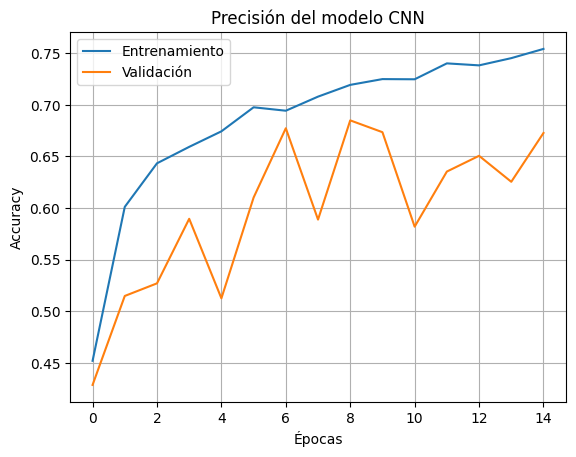

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.6811 - loss: 0.9618
Accuracy: 67.28%
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

      glioma       0.19      0.06      0.09       300
  meningioma       0.23      0.20      0.21       306
     notumor       0.32      0.43      0.37       405
   pituitary       0.23      0.32      0.27       300

    accuracy                           0.27      1311
   macro avg       0.24      0.25      0.23      1311
weighted avg       0.25      0.27      0.25      1311



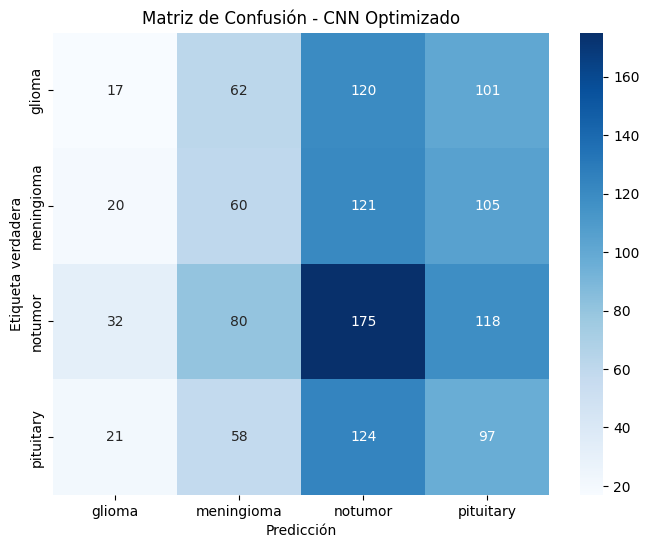

In [51]:
# Compilación + evaluación

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator
)

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo CNN')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
loss, acc = model.evaluate(test_generator)

print(f"Accuracy: {history.history['val_accuracy'][-1] * 100:.2f}%")

# Predicciones
y_pred_probs = model.predict(test_generator)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusión - CNN Optimizado")
plt.show()

## Análisis

In [52]:
import pandas as pd

resultados = {
    'Modelo': ['SVM', 'Random Forest', 'K-NN', 'Árbol de Decisión', 'CNN'],
    'Accuracy':     [0.9275, 0.9383, 0.8981, 0.8704, 0.6728],
    'Precision':    [0.9291, 0.9387, 0.8947, 0.8732, 0.25],
    'Recall':       [0.9275, 0.9383, 0.8981, 0.8704, 0.27],
    'F1-score':     [0.9237, 0.9375, 0.8941, 0.8704, 0.25]
}

df_resultados = pd.DataFrame(resultados)

print(df_resultados)

              Modelo  Accuracy  Precision  Recall  F1-score
0                SVM    0.9275     0.9291  0.9275    0.9237
1      Random Forest    0.9383     0.9387  0.9383    0.9375
2               K-NN    0.8981     0.8947  0.8981    0.8941
3  Árbol de Decisión    0.8704     0.8732  0.8704    0.8704
4                CNN    0.6728     0.2500  0.2700    0.2500


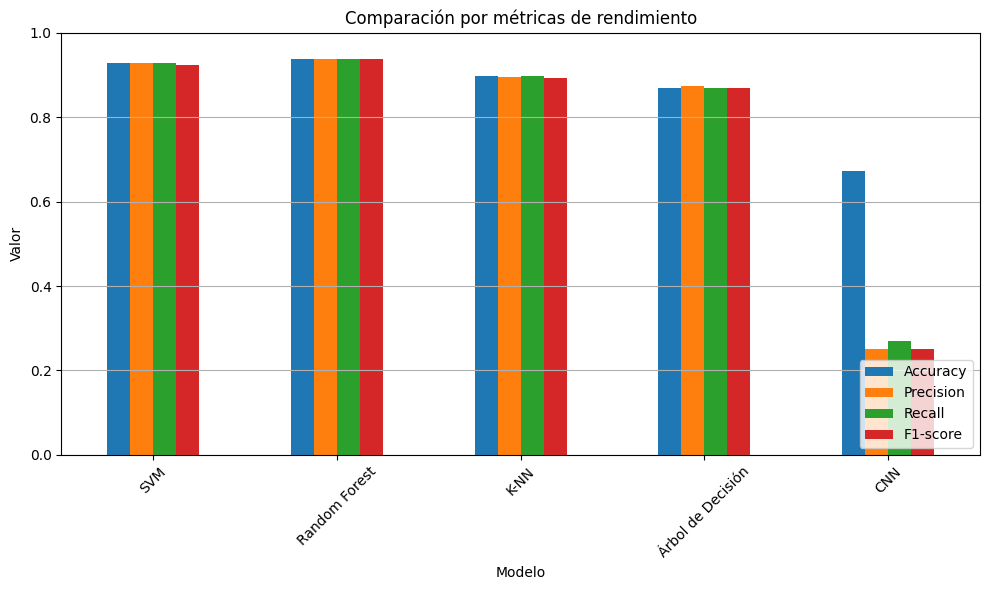

In [54]:
import matplotlib.pyplot as plt

df_resultados.set_index('Modelo').plot(kind='bar', figsize=(10, 6))
plt.title('Comparación por métricas de rendimiento')
plt.ylabel('Valor')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Interpretación

- Random Forest fue el modelo que obtuvo en mejor desempeño global, cuyos valores en todas las métricas suoperaron a las de los demás modelos.
- SVM y K-NN obtuvieron valores también muy altos, mostrando un desempeño estable y balanceado.
- La CNN, a pesar de haber mostrado un porcentaje apenas aceptable de accuracy, mostró un desempeño muy bajo en precisión, recall y F-1 score. Podemos interpretarlo como que, aunque logró clasificar correctamente algunas imágenes, tuvo un comportamiento muy inestable entre las clases glioma y meningioma.
  - El bajo rendimiento de este modelo pudo haber sido causado a que el dataset era relativamente pequeño (menos de 10,000 imágenes), por lo que pudo no haber tenido suficientes ejemplos de cada clase para generalizar correctamente
  - La arquitectura simple pudo haber sido una causa, aunque hice intentos con más capas, más filtros, etc. y el resultado era aún más bajo



## Conclusión

### Los modelos tradicionales resultaron mucho más efectivos que el CNN para este caso, siendo Random Forest el más apropiado, tanto por su alto rendimiento, como por su facilidad de implementación y menor tiempo de entrenamiento